## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2020-21 учебный год

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [2]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%pylab inline


data = pd.read_csv("https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv")
data


Populating the interactive namespace from numpy and matplotlib


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,>= 7 yrs,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,1 <= ... < 4 yrs,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,>= 7 yrs,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,1 <= ... < 4 yrs,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,>= 7 yrs,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,>= 7 yrs,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,< 1 yr,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,>= 7 yrs,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,< 1 yr,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [55]:
data.isnull().values.any()
# пропусков нет
data.dtypes.value_counts
data["people_liable"].value_counts()
# изначально я проставил большинству (кроме трех последних (бинарных) и int категориальные признаки, но исходя из 13 задачи поменял
# все, что как-то похоже на порядковые на порядковые))
# поскольку большинство признаков применимы в модели последней задачи, сделаю их бинарными, там 3-5 значений
# значения признаков смотрел через data["something"].value_counts()

# status                     object - порядковый
# duration                    int64 - количественный
# credit_history             object - порядковый
# purpose                    object - порядковый
# amount                      int64 - количественный
# savings                    object - порядковый
# employment_duration        object - порядковый
# installment_rate           object - порядковый
# personal_status_sex        object - категориальный
# other_debtors              object - порядковый
# present_residence          object - порядковый
# property                   object - порядковый
# age                         int64 - количественный
# other_installment_plans    object - порядковый
# housing                    object - порядковый
# number_credits             object - порядковый
# job                        object - порядковый
# people_liable              object - бинарный
# telephone                  object - бинарный
# foreign_worker             object - бинарный
# credit_risk                object - бинарный



0 to 2       845
3 or more    155
Name: people_liable, dtype: int64

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [32]:
data.groupby("purpose")['amount'].apply(lambda x: x.mean())

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [71]:
"{:.1%}".format(len(data[(data.age < 30) & (data.housing=="rent")]) / len(data[(data.age < 30)]))
# 66.7% от тех, кому меньше 30 снимают жилье
"{:.1%}".format(len(data[(data.age > 40) & (data.housing=="rent")]) / len(data[(data.age > 40)]))
# 68% от тех, кому больше 40 снимают жилье


'68.0%'

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [82]:
# сначала выясним через value_counts(), какие значения количества кредитов в принципе есть в датафрейме, под больше
# 3 попадают 4-5 и >= 6
len(data[(data.foreign_worker=="yes") & ((data.number_credits=="4-5") | (data.number_credits==">= 6"))])

1

### Задание 6 (1 балл)

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

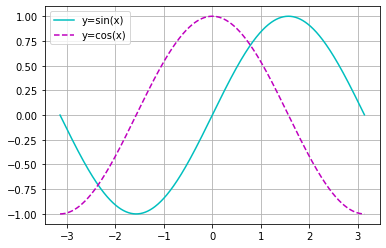

In [163]:
t = arange(-pi, pi, 0.01)
# Не совсем понятно, что подразумевается под 100 точками: 100 точек на 1 см по X или 100 точек во всем графике?
# Искомый результат достигается при 100 точках на 1 см по X
y1 = plt.plot(t, sin(t), color='c', label = 'y=sin(x)')
y2 = plt.plot(t, cos(t), 'g--', color='m', label = 'y=cos(x)')

pylab.legend(loc='upper left')

plt.grid()



### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

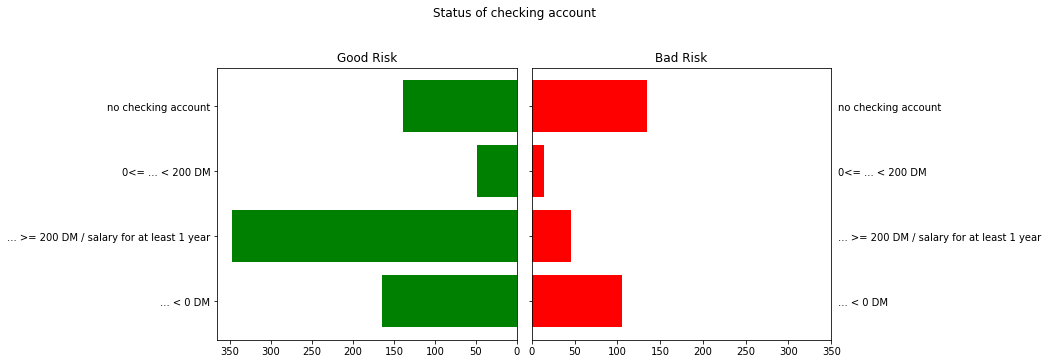

In [126]:
good = data[(data.credit_risk == "good")]
x1 = good.groupby('status', as_index = False).count()['status']
y1 = good.groupby('status', as_index = False).count()['credit_risk']
bad = data.loc[(data.credit_risk == "bad")]
x2 = bad.groupby('status', as_index = False).count()['status']
y2 = bad.groupby('status', as_index = False).count()['credit_risk']

fig, axes = plt.subplots(ncols = 2, figsize = (11, 5), sharey = True)

fig.suptitle('Status of checking account', y = 1.05)
axes[0].barh(x1, y1, align = 'center', color = 'green')
axes[0].set_title('Good Risk')
axes[1].barh(x2, y2, align = 'center', color = 'red')
axes[1].set_title('Bad Risk')
axes[0].invert_xaxis()
axes[1].set_xlim(0, 350)

plt.subplots_adjust(wspace=0.05)
axes[1].tick_params(labelright=True)

plt.show()


### Задание 8  (0.5 балла)

In [4]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

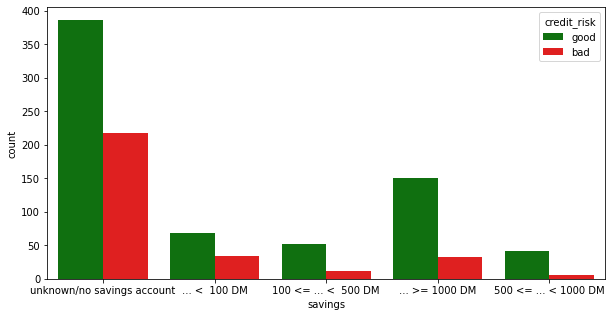

In [191]:
plt.figure(figsize=(10,5))
sns.countplot(x='savings', hue='credit_risk', data=data, palette=sns.color_palette(['green','red']))

plt.show()



### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

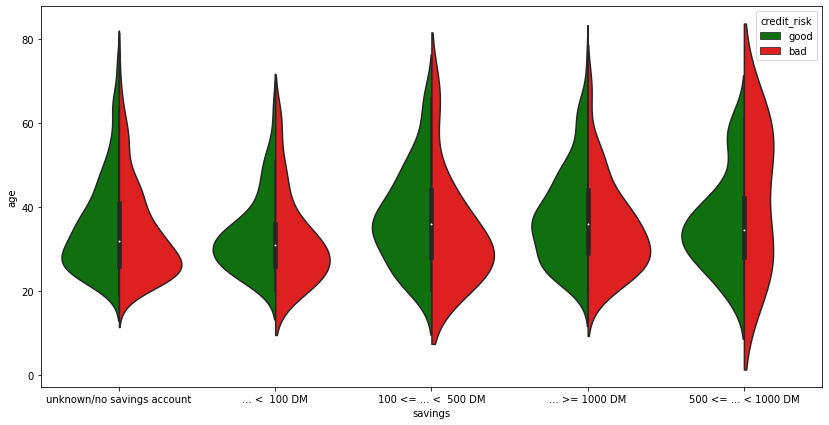

In [190]:
plt.figure(figsize=(14,7))
sns.violinplot(x='savings', y='age', hue='credit_risk', data=data, split=True, palette=sns.color_palette(['green','red']))

plt.show()

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  app.launch_new_instance()


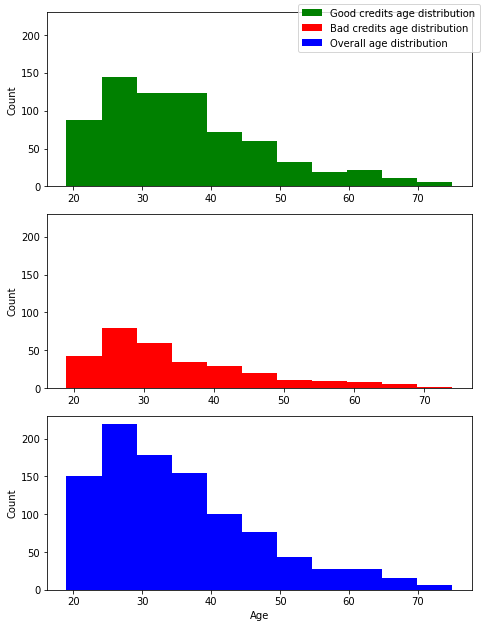

In [163]:
good = data[(data.credit_risk == "good")]
bad = data[(data.credit_risk == "bad")]

fig, axs = plt.subplots(3, sharey=True, tight_layout=True, figsize=(6.75,8.75))

axs[0].hist(good.age, bins=11, color='green')
axs[0].set_ylabel('Count')
axs[1].hist(bad.age, bins=11, color='red')
axs[1].set_ylabel('Count')
axs[2].hist(data.age, bins=11, color='blue')
axs[2].set_xlabel('Age')
axs[2].set_ylabel('Count')

line_labels = ["Good credits age distribution", "Bad credits age distribution", "Overall age distribution"]

fig.legend([axs[0],axs[1],axs[2]],labels= line_labels,loc="upper right",borderaxespad=0.5,)

plt.show()


### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

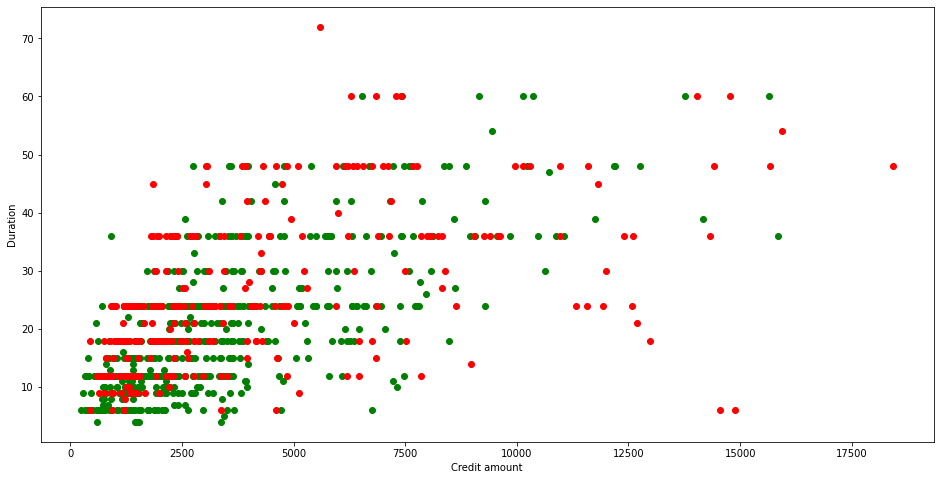

In [11]:
fig, ax = plt.subplots(figsize=(16,8))

good = data[(data.credit_risk == "good")]
bad = data[(data.credit_risk == "bad")]


ax.scatter(x = good['amount'], y = good['duration'], c='g')
ax.scatter(x = bad['amount'], y = bad['duration'], c='r')
ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')

plt.show()

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

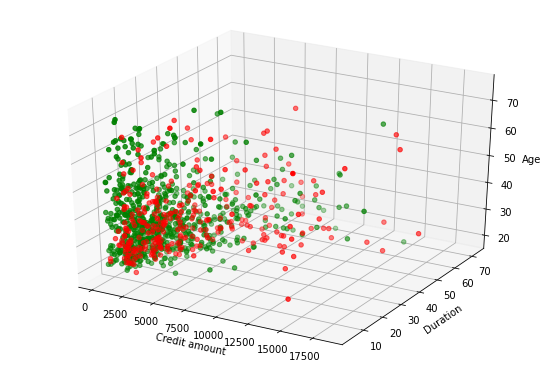

In [41]:
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure(figsize=(7.5,5))
ax = Axes3D(fig)

good = data[(data.credit_risk == "good")]
bad = data[(data.credit_risk == "bad")]


ax.scatter(xs = good['amount'], ys = good['duration'], zs = good['age'], c='g')
ax.scatter(xs = bad['amount'], ys = bad['duration'], zs = bad['age'], c='r')
ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')

plt.show()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [25]:
pure_data = data.drop("personal_status_sex", axis=1)
# категориальный (точнее просто ненужный по моему мнению) признак убрали

people_liable = pd.get_dummies(pure_data['people_liable'])
pure_data['people_liable'] = people_liable
telephone = pd.get_dummies(pure_data['telephone'])
pure_data['telephone'] = telephone
foreign_worker = pd.get_dummies(pure_data['foreign_worker'])
pure_data['foreign_worker'] = foreign_worker
credit_risk = pd.get_dummies(pure_data['credit_risk'])
pure_data['credit_risk'] = credit_risk
# значения бинарных признаков перевели в 0 и 1

# по заданию кодировать количественные признаки не нужно, так что не буду
# теперь надо перекодировать все порядковые признаки, их 13

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

pure_data['status'] = label.fit_transform(pure_data['status'])
pure_data['credit_history'] = label.fit_transform(pure_data['credit_history'])
pure_data['savings'] = label.fit_transform(pure_data['savings'])
pure_data['employment_duration'] = label.fit_transform(pure_data['employment_duration'])
pure_data['installment_rate'] = label.fit_transform(pure_data['installment_rate'])
pure_data['other_debtors'] = label.fit_transform(pure_data['other_debtors'])
pure_data['present_residence'] = label.fit_transform(pure_data['present_residence'])
pure_data['property'] = label.fit_transform(pure_data['property'])
pure_data['other_installment_plans'] = label.fit_transform(pure_data['other_installment_plans'])
pure_data['housing'] = label.fit_transform(pure_data['housing'])
pure_data['number_credits'] = label.fit_transform(pure_data['number_credits'])
pure_data['job'] = label.fit_transform(pure_data['job'])
pure_data['purpose'] = label.fit_transform(pure_data['purpose'])
pure_data

# порядковые перекодировал, вывел таблицу, попробую что-то с 14 сделать

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,3,18,0,2,1049,4,2,2,2,3,1,21,1,0,0,1,1,1,1,0
1,3,9,0,5,2799,4,0,1,2,0,3,36,1,0,1,1,0,1,1,0
2,0,12,4,8,841,0,1,1,2,3,3,23,1,0,0,3,1,1,1,0
3,3,12,0,5,2122,4,0,0,2,0,3,39,1,0,1,3,0,1,0,0
4,3,12,0,5,2171,4,0,2,2,3,1,38,0,2,1,3,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,24,4,4,1987,4,0,1,2,3,3,21,1,0,0,3,0,1,1,1
996,3,24,4,5,2303,4,3,2,0,2,3,45,1,2,0,1,1,1,1,1
997,1,21,0,5,12680,1,3,2,2,3,2,30,1,1,0,0,1,0,1,1
998,0,12,4,4,6468,1,4,1,2,2,2,52,1,2,0,0,1,0,1,1


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

NameError: ignored